Automatically created module for IPython interactive environment


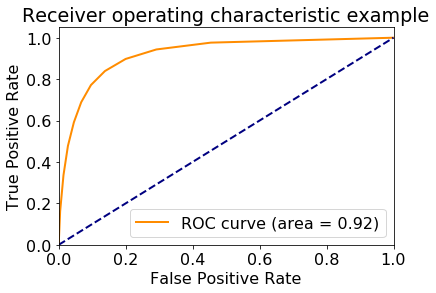

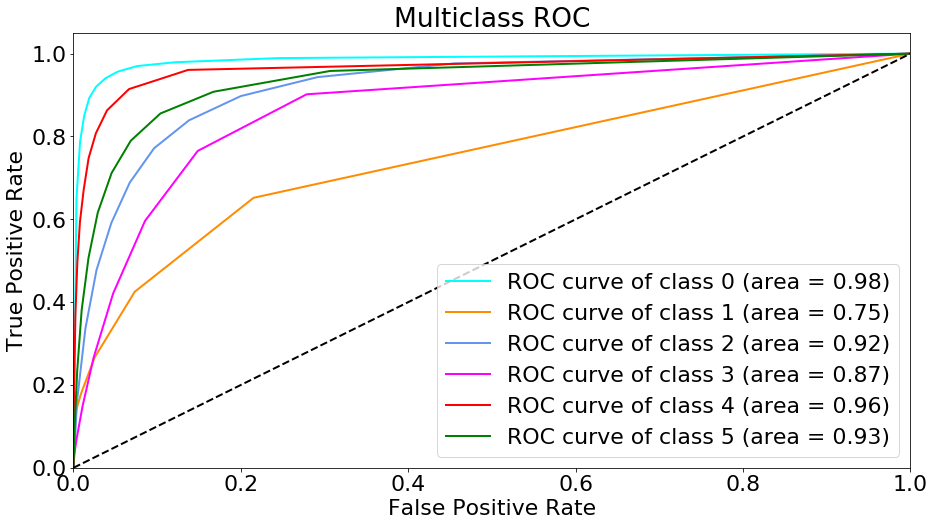

In [28]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with

# Binarize the output

features = pd.read_csv('G:/EEG Project/Hut lab data/10_sec_epochs/cwt_spectral features/Fpz-C3/output.csv',index_col=0)
features = features[~np.isnan(features['Df'])]   #H_complexity, AR_7, Gr
features = features[features.scores != 6]
# features['scores'].replace([1, 2, 3, 4], 3, inplace=True)

X = features.loc[:, features.columns != 'scores']
y = features['scores']
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state=0)


# Add noisy features to make the problem harder

# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 22})

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'magenta', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.savefig('ROC_RF_cwt.jpg')
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

# features = pd.read_csv('G:/EEG Project/Hut lab data/30_sec_epochs/cwt_spectral features/Oz-C4/output.csv',index_col=0)
# features = features[features.Score != 6]
# features['Score'].replace([1, 2, 3, 4], 3, inplace=True)
# plt.plot(features['Dc'])
# plt.show()

# Random Forest (RF)

Cross-validation: 77.4 +/- 0.6
channel being proccessed: Oz-Cz
time elapsed: 117.2715916633606
Cross-validation: 76.7 +/- 0.4
channel being proccessed: Oz-Fpz
time elapsed: 125.509122133255
Cross-validation: 78.0 +/- 0.5
channel being proccessed: Oz-C3
time elapsed: 130.56548190116882
Cross-validation: 77.4 +/- 0.8
channel being proccessed: Oz-C4
time elapsed: 134.4550564289093
Cross-validation: 78.2 +/- 0.5
channel being proccessed: Cz-Fpz
time elapsed: 132.9356186389923
Cross-validation: 76.4 +/- 0.3
channel being proccessed: Cz-C3
time elapsed: 121.10312342643738
Cross-validation: 76.3 +/- 0.5
channel being proccessed: Cz-C4
time elapsed: 128.37606620788574
Cross-validation: 78.9 +/- 0.6
channel being proccessed: Fpz-C3
time elapsed: 136.952250957489
Cross-validation: 77.9 +/- 0.7
channel being proccessed: Fpz-C4
time elapsed: 140.33108472824097
Cross-validation: 77.6 +/- 0.4
channel being proccessed: C3-C4
time elapsed: 127.9332799911499
Completed!


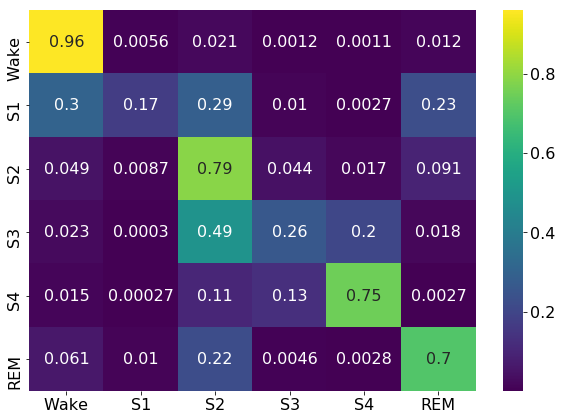

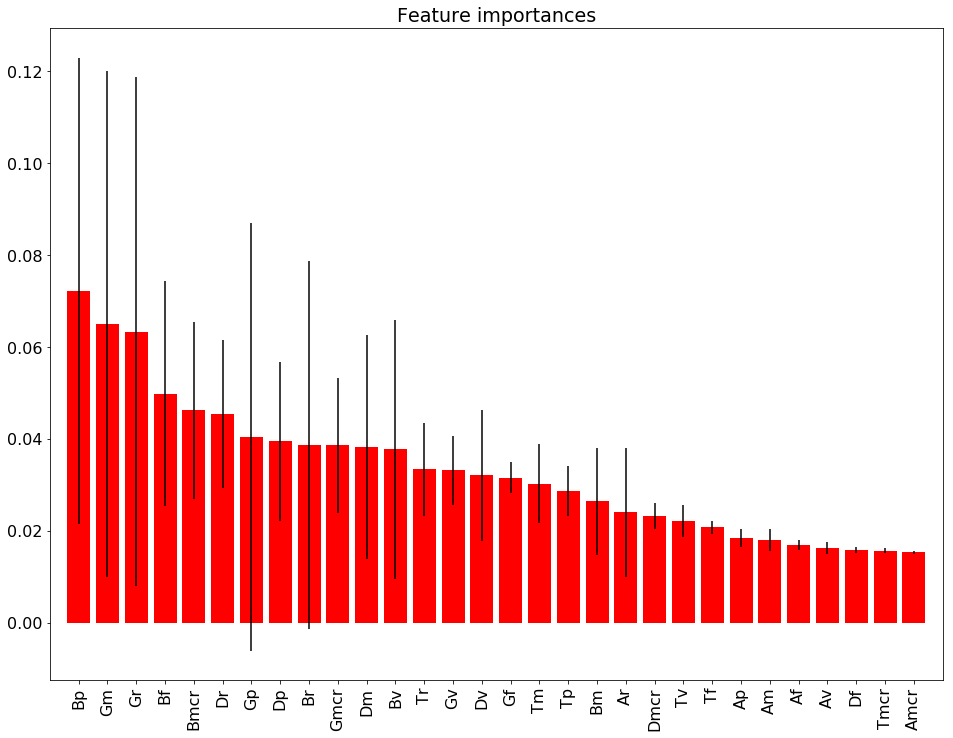

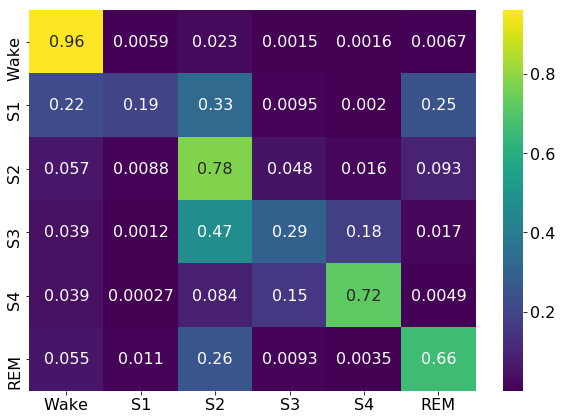

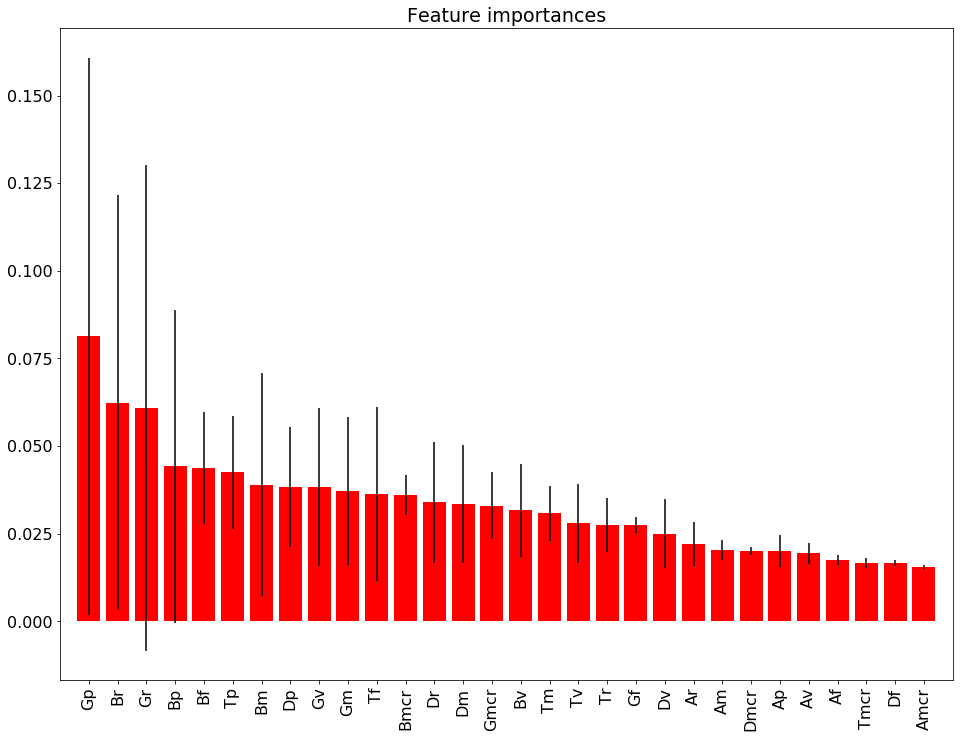

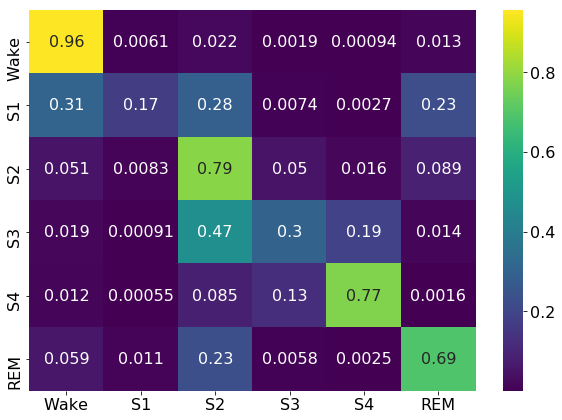

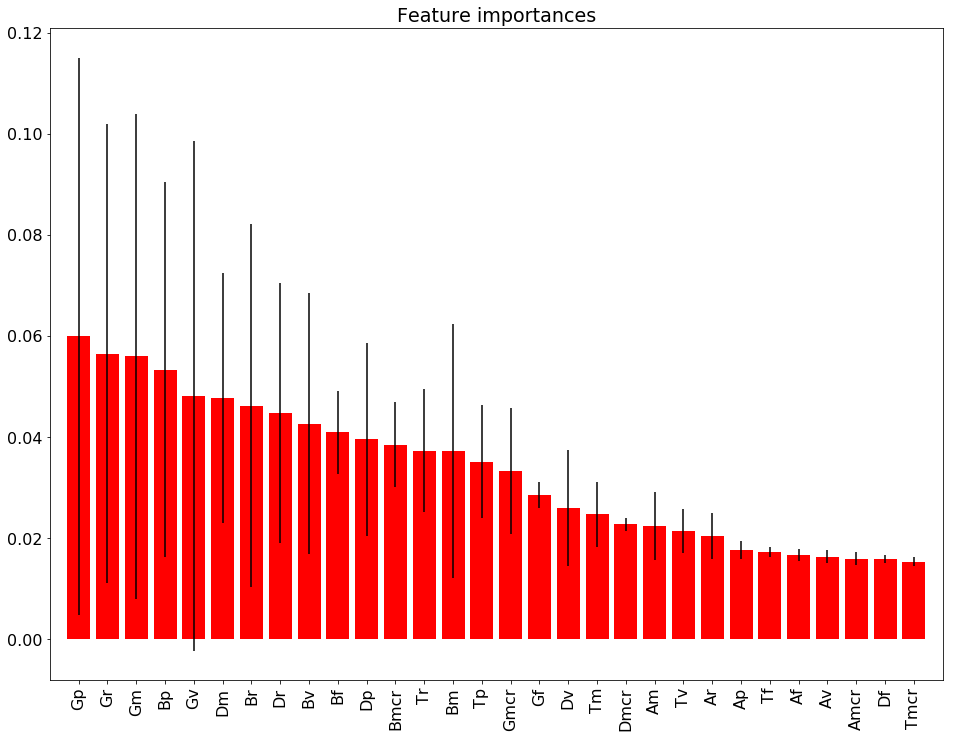

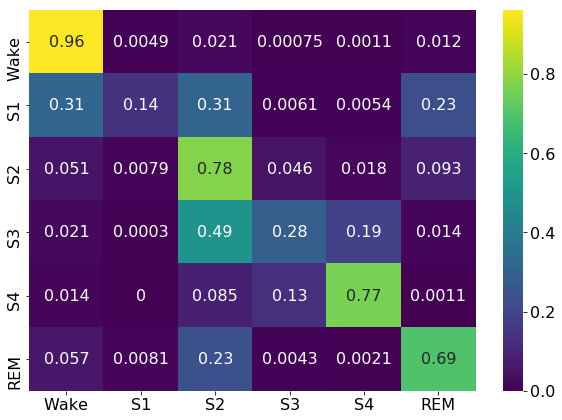

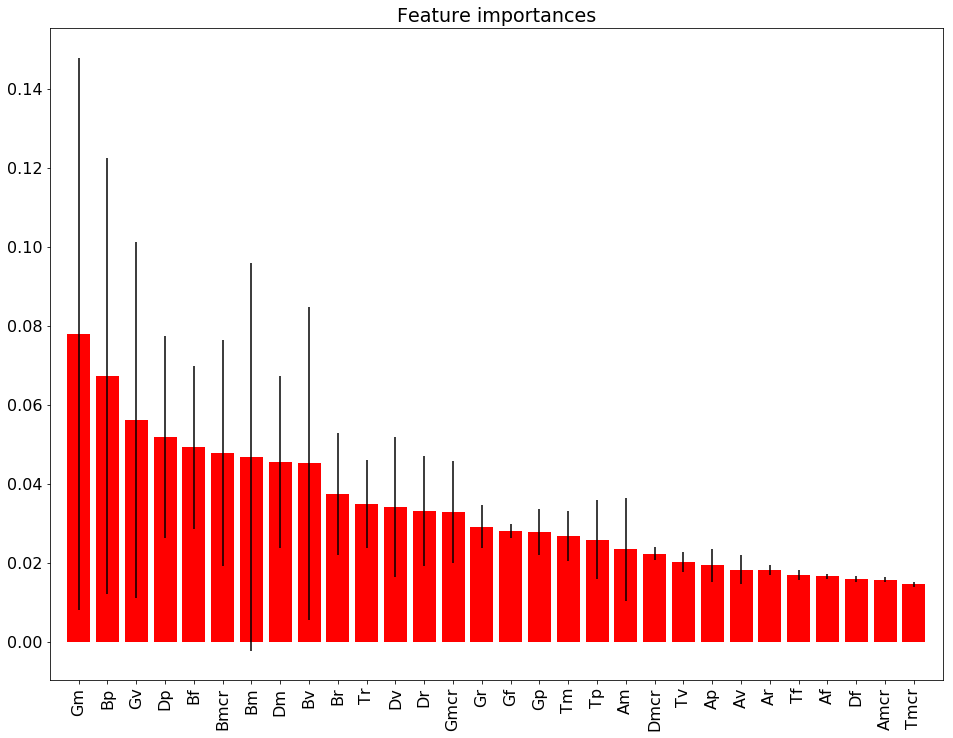

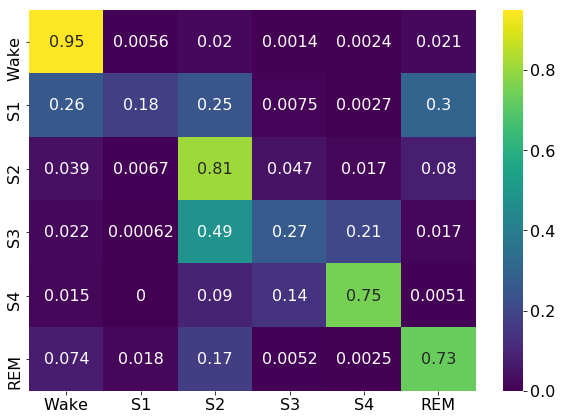

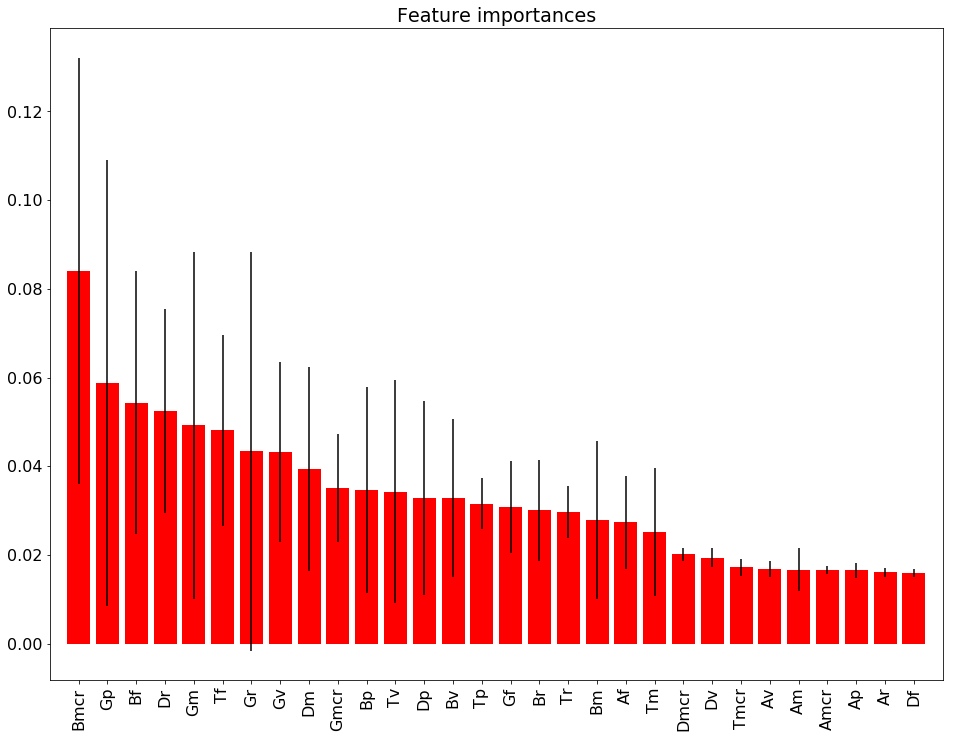

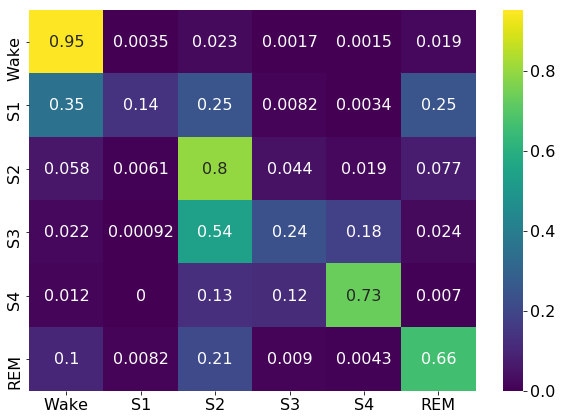

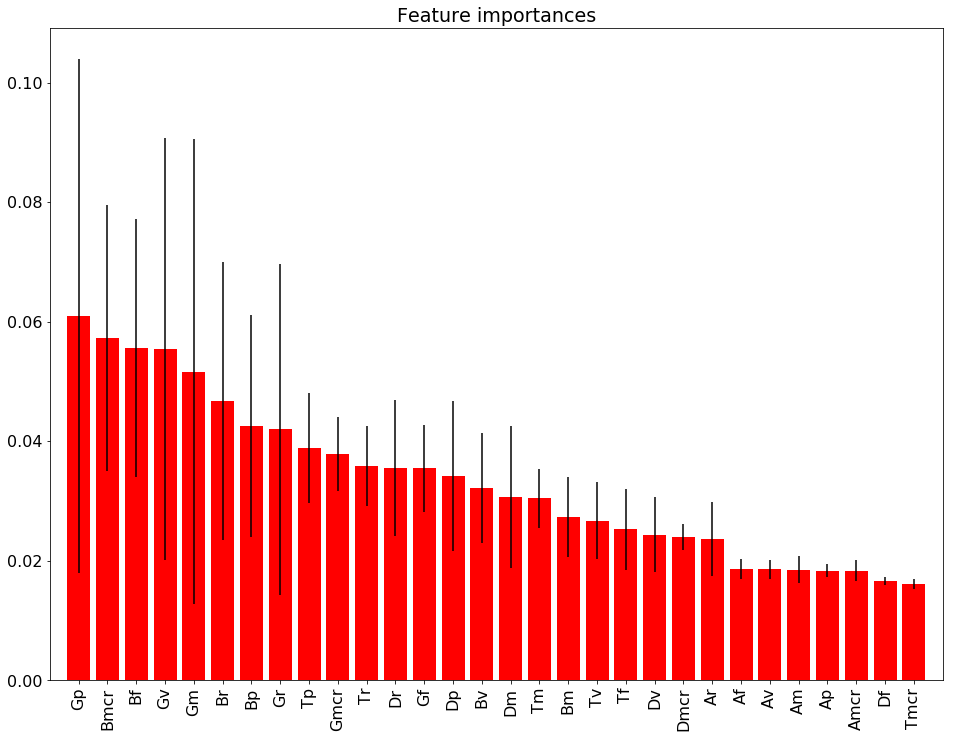

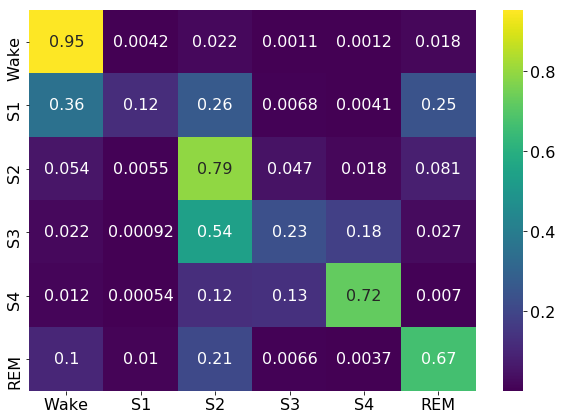

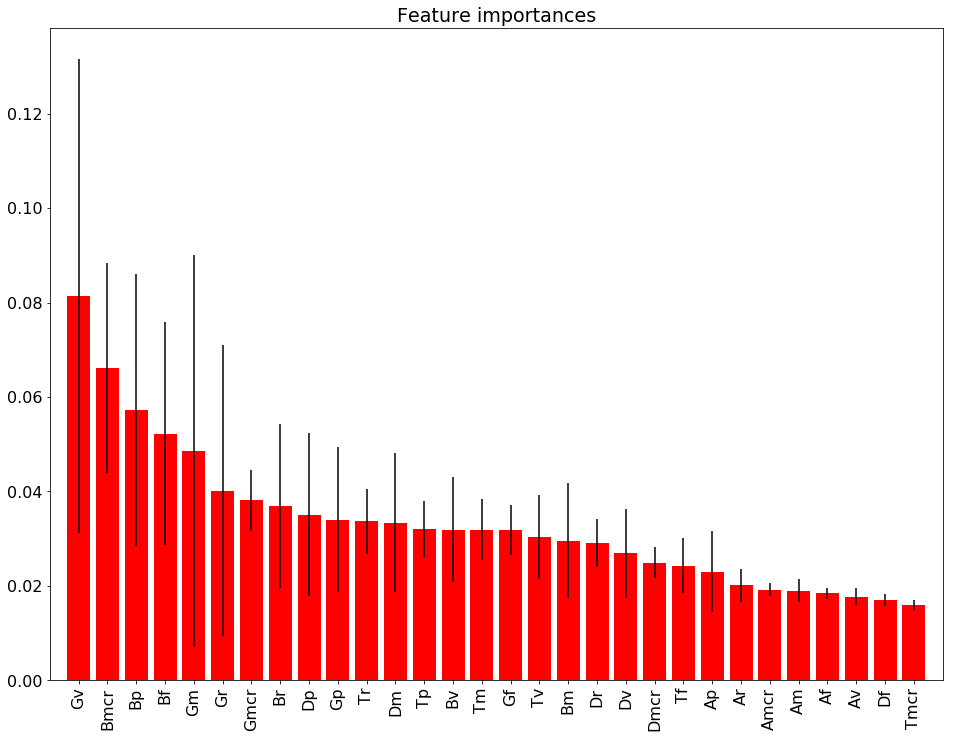

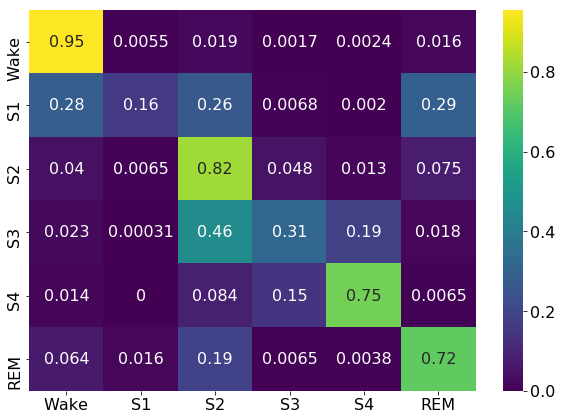

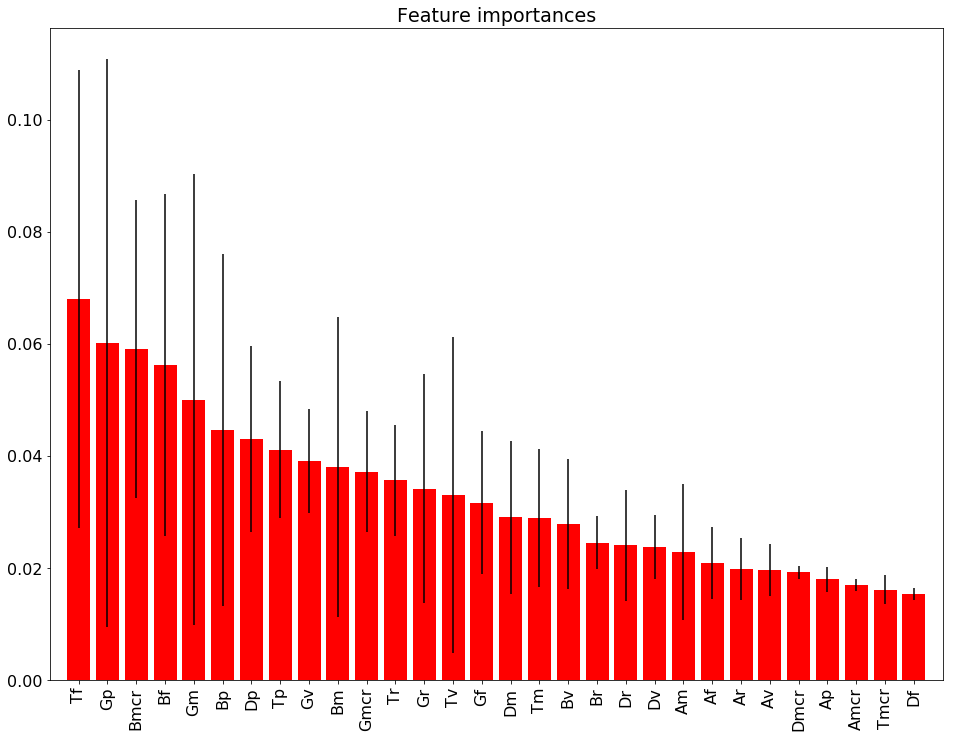

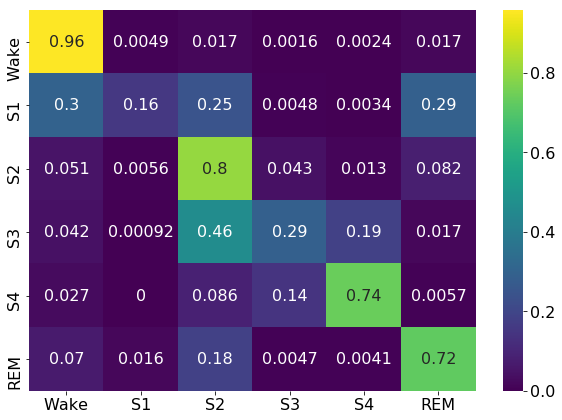

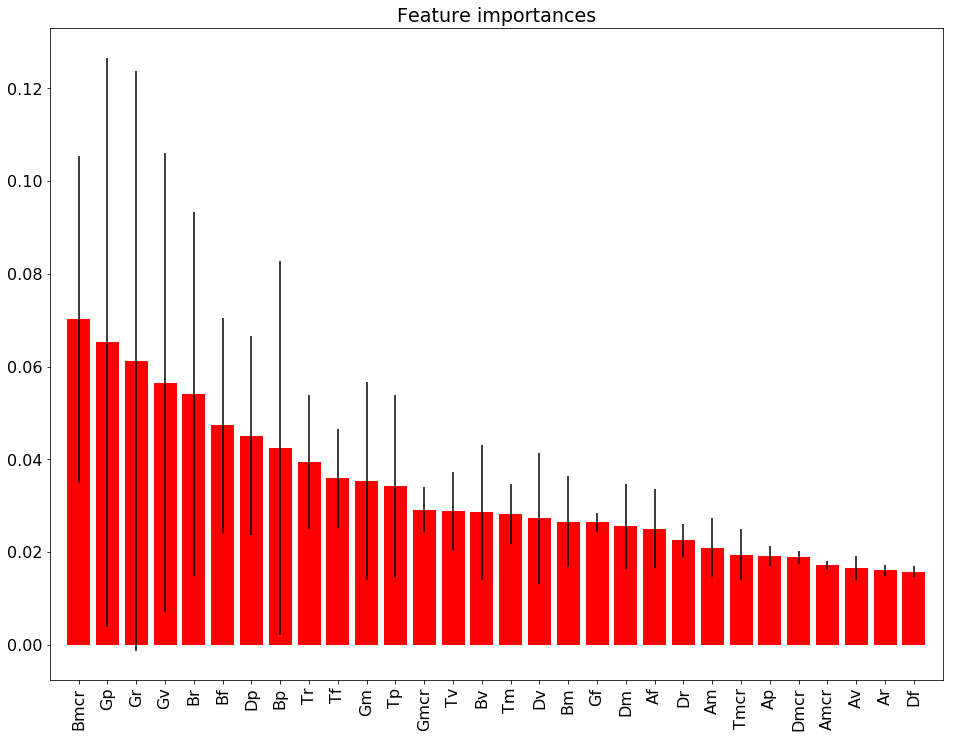

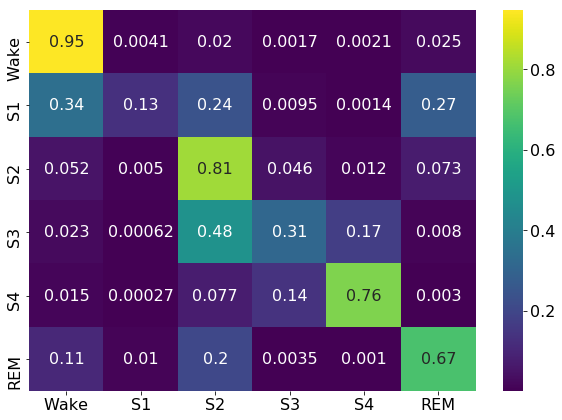

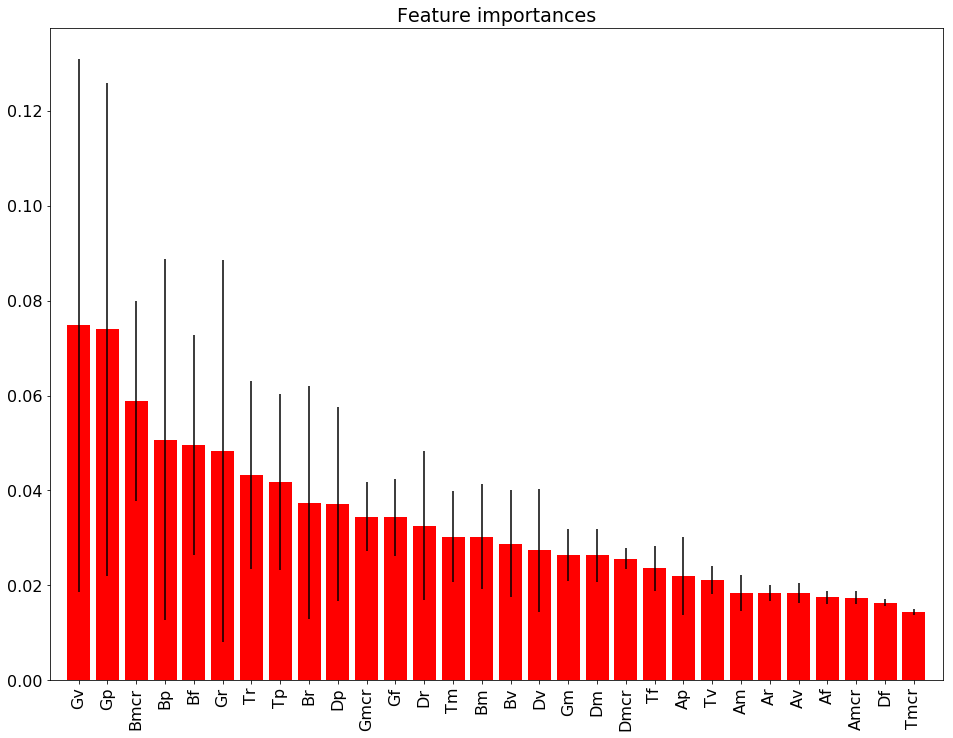

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
import time


list_of_scores = []
channels = ['Oz-Cz', 'Oz-Fpz', 'Oz-C3', 'Oz-C4', 'Cz-Fpz', 'Cz-C3', 'Cz-C4', 'Fpz-C3', 'Fpz-C4', 'C3-C4'] #
for channel in channels:
    start = time.time()
    features = pd.read_csv('G:/EEG Project/Hut lab data/10_sec_epochs/cwt_spectral features/'+channel+'/output.csv',index_col=0)
    features = features[~np.isnan(features['Df'])]   #H_complexity, AR_7, Gr
    features = features[features.scores != 6]
#     features['scores'].replace([1, 2, 3, 4], 3, inplace=True)

    X = features.loc[:, features.columns != 'scores']
    y = features['scores']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.21, random_state=0)
#     clf = KNeighborsClassifier(n_neighbors=30)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    results = cross_val_score(clf, X_train, y_train, cv=10)
    accuracy = results.mean()*100
    limits = (results.std() * 2)*100
    print("Cross-validation: %0.1f +/- %0.1f" % (results.mean()*100, (results.std() * 2)*100))

    predictions = clf.predict(X_test)
    CM = confusion_matrix(y_test, predictions)
    FP = CM.sum(axis=0) - np.diag(CM)  
    FN = CM.sum(axis=1) - np.diag(CM)
    TP = np.diag(CM)
    TN = CM.sum() - (FP + FN + TP)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    f1 = 2*TP/(2*TP+FP+FN)
    np.set_printoptions(precision=1)
    list_of_scores.append([accuracy, limits, sensitivity, specificity, precision, f1])
    

    classes = ['Wake', 'S1', 'S2', 'S3', 'S4', 'REM'] #'S1', 'S2', 'S3', 'S4', 'Movement'
    cm = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]

    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                      columns = [i for i in classes])
    plt.figure(figsize = (10,7))

    sns_hm = sn.heatmap(df_cm, annot=True, fmt='.2g', cmap="viridis")
    plt.savefig('G:/EEG Project/Hut lab data/10_sec_epochs/cwt_spectral features/'+channel+'/con_mat_rf_6.png')

    
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    features_names = X_train.columns 
    features_names = [features_names[i] for i in indices]
    plt.figure(figsize = (16,12))
    plt.rcParams.update({'font.size': 16})
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X_train.shape[1]), features_names, rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.savefig('G:/EEG Project/Hut lab data/10_sec_epochs/AR features/'+channel+'/feat_imp_6.png')
    
    
    end = time.time()
    elapsed = end-start
    print('channel being proccessed: {}'.format(channel))
    print('time elapsed: {}'.format(elapsed))
    
new_df = pd.DataFrame(list_of_scores)
new_df.columns = ['Accuracy', 'Error +/-', 'Sensitivity', 'Specificity', 'Precision', 'F1']
new_df.to_csv('G:/EEG Project/Hut lab data/10_sec_epochs/cwt_spectral features/results_rf6.csv')
print('Completed!')

In [ ]:
### $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# clf = KNeighborsClassifier(n_neighbors=30)
# clf = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

# importances = clf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]
# features_names = X_train.columns 
# features_names = [features_names[i] for i in indices]
# plt.figure(figsize = (15,8))
# plt.title("Feature importances")
# plt.bar(range(X_train.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), features_names, rotation=90)
# plt.xlim([-1, X_train.shape[1]])

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cross_validation import train_test_split
# import sys
# import warnings

# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
    
# features = pd.read_csv('time_features_Oz-Fpz/combined_features.csv',index_col=0)
# features = features[~np.isnan(features['scores'])]
# features = features[features.scores < 6]
# features.head()
# X = features[['std', 'skewness', 'ZCR', 'mean', 'min', 'max', 'kurtosis', '25%', '75%', '50%']]
# y = features['scores']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# is_nan = np.any(np.isnan(y_train))
# is_finite = np.all(np.isfinite(y_train))
# print("Scores of value higher than intended: ", (y > 6).any())
# print("Is nan should be false, Result: ", is_nan)
# print("Is finite should be true, Result: ", is_finite)

In [ ]:
# from sklearn import svm
# from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# import time
# Ac_array = np.zeros(100, )
# Se_array = np.zeros((100, 6))
# Sp_array = np.zeros((100, 6))
# t_array = np.zeros(100, )
# i_array = np.zeros(100, )

# for i in range(100):
#     X_train = []
#     X_test = []
#     y_train = []
#     y_test = []
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#     start = time.time()

#     clf = RandomForestClassifier()
#     clf.fit(X_train, y_train)
#     end = time.time()
#     elapsed = end - start
# #     print("Time to complete: ", elapsed, "seconds")

#     predictions = clf.predict(X_test)

#     accuracy = accuracy_score(y_test, predictions)
# #     print("Accuracy: " , accuracy)
#     CM = confusion_matrix(y_test, predictions)
#     FP = CM.sum(axis=0) - np.diag(CM)  
#     FN = CM.sum(axis=1) - np.diag(CM)
#     TP = np.diag(CM)
#     TN = CM.sum() - (FP + FN + TP)
#     Sensitivity = TP/(TP+FN)
#     Specificity = TN/(TN+FP)
    
#     Ac_array[i] = accuracy
#     Se_array[i] = Sensitivity
#     Sp_array[i] = Specificity
#     t_array[i] = elapsed
#     i_array[i] = i+1
# #     print("Specificity: ", Specificity.tolist())
# #     print("Sensitivity: ", Sensitivity.tolist())
#     print("Comleted the "+str(i+1)+" iteration")

In [ ]:
# df = pd.DataFrame(Ac_array)
# df.columns = ['Accuracy']
# df1 = pd.DataFrame(t_array)
# df1.columns = ['time_elapsed']
# df2 = pd.DataFrame(Sp_array)
# df2.columns=['Sp0','Sp1','Sp2','Sp3','Sp4','Sp5',]
# df3 = pd.DataFrame(Se_array)
# df3.columns=['Se0','Se1','Se2','Se3','Se4','Se5',]
# result = pd.concat([df1, df, df3, df2], axis=1)
# result.to_csv("results_RF_Oz-Fpz.csv")